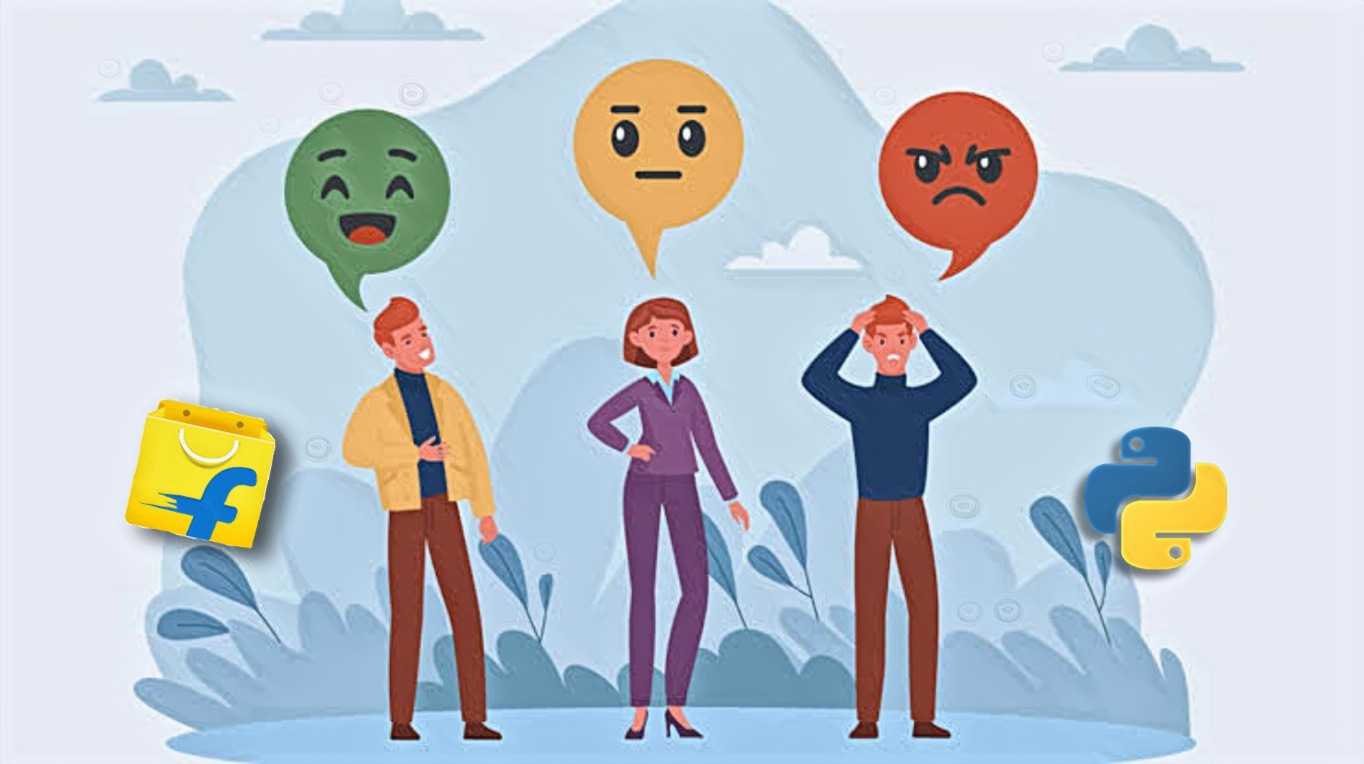

### **Introduction:**
##### Flipkart, a prominent Indian e-commerce platform, attracts a diverse range of customers who provide valuable feedback through reviews. In this project, we delve into the sentiment of Flipkart's Home Appliances category reviews using Python and data analytics techniques.
##### ***Our exploration begins with fundamental questions:***

##### - _How do customers typically rate the products they purchase from Flipkart?_
##### - _What key patterns and sentiments emerge from the analysis of customer reviews on the platform?_
##### - _What is the predominant sentiment expressed by most reviewers regarding Flipkart's products and services?_
##### - _By aggregating sentiment scores, what overall conclusions can be drawn about the sentiment of Flipkart reviews and customer perceptions?_

##### ***Join with me as I navigate you through the data, uncovering insights into customer sentiments and perceptions of Flipkart's offerings.***

#### ***Let’s start this task by importing the necessary Python libraries and the ataset***

In [1]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
df = pd.read_csv("/kaggle/input/flipkart-dataset-for-sentiment-analysis/Flipkart_Dataset.csv")

#### ***Lets take a Quick Preview of Our Dataframe***

In [3]:
df.head()

,Product_name,Price,Rating,Review,Summary
0,"Crompton 75 L Desert Air Cooler-(White, Teal, ...","₹10,499.00",5,Simply awesome,it's really worth every single penny. it works...
1,"Crompton 75 L Desert Air Cooler-(White, Teal, ...","₹10,499.00",4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...
2,"Crompton 75 L Desert Air Cooler-(White, Teal, ...","₹10,499.00",5,Worth every penny,GREAT packaging by seller. As this was the mos...
3,"Crompton 75 L Desert Air Cooler-(White, Teal, ...","₹10,499.00",5,Fabulous!,Delivery was delayed by two days except this e...
4,"Crompton 75 L Desert Air Cooler-(White, Teal, ...","₹10,499.00",4,Nice product,A Good cooler by Crompton. The height of the c...


#### ***So our Dataframe contains 5 columns named as 'Product_name', 'Price', 'Rating', 'Review' and 'Summary'.***
#### ***lets check dimention of DataFrame and Datatypes of each columns***

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20801 entries, 0 to 20800
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  20801 non-null  object
 1   Price         20801 non-null  object
 2   Rating        20801 non-null  int64 
 3   Review        20801 non-null  object
 4   Summary       20801 non-null  object
dtypes: int64(1), object(4)
memory usage: 812.7+ KB
None


In [5]:
print(df.dtypes)

Product_name    object
Price           object
Rating           int64
Review          object
Summary         object
dtype: object


#### ***Next we check for NULL and DUPLICATE values if there are any.***

In [6]:
print(df.isnull().sum())

Product_name    0
Price           0
Rating          0
Review          0
Summary         0
dtype: int64


#### ***Our Dataframe don't have any NULL Values***

In [7]:
print(df.duplicated().sum())

1774


#### ***Okay! We have 1700+ Duplicate Values, which can skew our results so Lets Remove them and make our Dataframe look more clean***

In [8]:
df.drop_duplicates(inplace=True) #Dropping Duplicate entries (inplace commits changes to DF)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19027 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  19027 non-null  object
 1   Price         19027 non-null  object
 2   Rating        19027 non-null  int64 
 3   Review        19027 non-null  object
 4   Summary       19027 non-null  object
dtypes: int64(1), object(4)
memory usage: 891.9+ KB
None


#### ***As we done with Cleaning and Processing, next we move on to analysis for finding answer of first question, the 'Rating' column contains the ratings given by each Buyer, So let’s have a look at how most of the buyers rate the products they bought on flipkart.***

In [10]:
ratings = df['Rating'].value_counts()
numbers = ratings.index
quantity = ratings.values

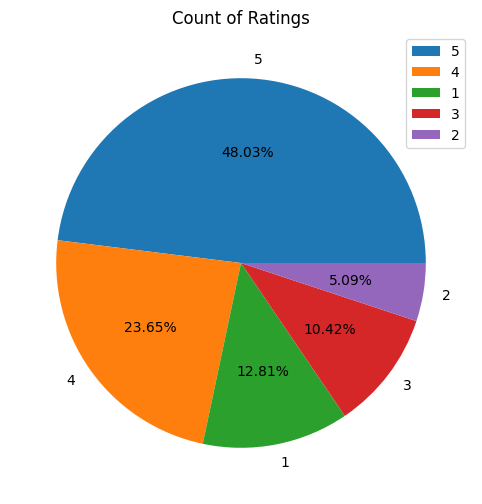

In [11]:
fig=plt.figure(figsize=(8,6))
plt.pie(ratings, labels=numbers, autopct='%1.2f%%')
plt.title("Count of Ratings")
plt.legend(numbers)
plt.show()

### ***Less than 50% of total buyers Rated 5 out of 5, while more than 20% buyers rated 4 out of 5. which shows that Overall 70% of total buyers are satisfied and are happy customers.***

#### ***Now let’s have a look at What kind of reviews are given by people. to visualize the most used words in the 'Review' column we will use a word cloud.***

In [12]:
# Latest Python 3.12 users facing problem with wordcloud, if you run this code chunk with python 3.12 it will throw ERROR
# Wait for wordcloud bug fix or downgrade your python version to olders version like 3.11|3.10|3.09 etc
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(i for i in df.Review)
stopword = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stopword, background_color='black').generate(text)

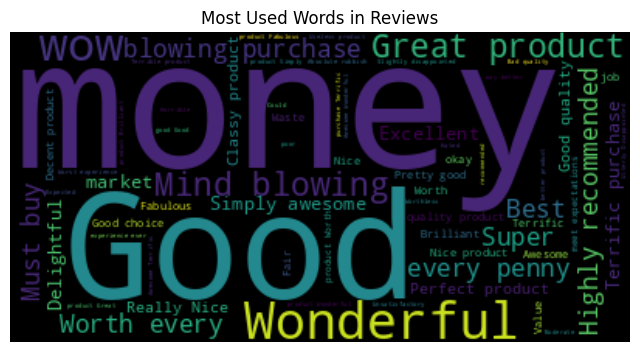

In [13]:
plt.figure( figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Used Words in Reviews")
plt.show()

#### ***Now lastly we need to analyze the sentiments of Flipkart review "Summary". for that we add three columns into this dataset as Positive, Neutral and Negative by calculating the sentiment scores of the review Summaries.***
#### But before that we need to clean text strings of each Summary, for cleaning we create an function with help of RegularExpession.

In [14]:
import string
stemmer = nltk.SnowballStemmer("english")
def text_clean(text):
    text = str(text).lower() #converts review columns to string dtype then lower case words
    text = re.sub(r'\[.*?\]', '', text) #removes dots(.) from string
    text = re.sub(r'https?://\S+|www\.\S+', '', text) #removes web links from string
    text = re.sub(r'<.*?>+', '', text) #removes HTML tags from string 
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) #removes punctuations
    text = re.sub(r'\n', '', text) #removes new line character
    text = re.sub(r'\w*\d\w*', '', text) #removes any words containing Numerical value
    text = [word for word in text.split(' ') if word not in stopword] 
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')] 
    text=" ".join(text)
    return text

In [15]:
df['Summary'] = df['Summary'].apply(text_clean)

### ***Adding Columns to the Dataframe***

In [16]:
sentiments = SentimentIntensityAnalyzer()
df['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in df['Summary']]
df['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df['Summary']]
df['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in df['Summary']]

In [17]:
df = df[["Review", "Positive", "Negative", "Neutral"]]

In [18]:
print(df.head())

                                              Review  Positive  Negative  \
0                                     Simply awesome     0.281     0.000   
1  Worth the money . Desert Cooler live up to the...     0.242     0.044   
2                                  Worth every penny     0.296     0.000   
3                                          Fabulous!     0.245     0.039   
4                                       Nice product     0.377     0.000   

   Neutral  
0    0.719  
1    0.714  
2    0.704  
3    0.716  
4    0.623  


### ***Now let’s see how most of the reviewers think about the products and services of Flipkart:***

In [19]:
pos = sum(df["Positive"])
neg = sum(df["Negative"])
neu = sum(df["Neutral"])

### ***Lets write an function for comparing each category and find which sentiment is showed in most of Reviews***

In [20]:
def sentiment_result(x, y, z):
    if (x>y) and (x>z):
        print("Positive")
    elif (y>x) and (y>z):
        print("Negative")
    else:
        print("Neutral")

In [21]:
sentiment_result(pos,neg,neu)

Positive


### ***Surprisingly Overall! most of the reviews are Positive.***
### ***So Let’s have a look at the total of Positive, Neutral, and Negative sentiment scores to find a conclusion about Flipkart reviews "Summary"***

In [22]:
print("Positive: ", pos)
print("Negative: ", neg)
print("Neutral: ", neu)

Positive:  9030.750999999947
Negative:  1104.2190000000005
Neutral:  8888.99300000006


#### ***To Naked Eyes Positive and Neutral are sharing very close margin, lets see this in easily understandable manner with an visual (Pie Chart)***

In [23]:
sentiment = df[['Positive', 'Neutral', 'Negative']].sum()
counts = sentiment.index
quantity = sentiment.values

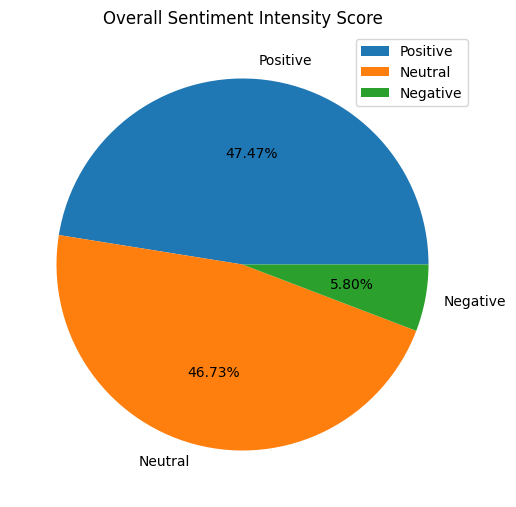

In [24]:
fig=plt.figure(figsize=(6,7))
plt.pie(sentiment,labels=counts, autopct='%1.2f%%')
plt.title("Overall Sentiment Intensity Score")
plt.legend(counts, loc='upper right')
plt.show()

#### ***Finally Performing sentiment analysis on "Summary" column reveals us that Reviews are almost evenly shared between "Positive"(47.47%) and "Neutral"(46.73%) Category with very small margin of difference(0.74%), and very less proportion of people gave Negative Reviews on Products(5.80%). Overall Flipkart is Providing High Customer Statisfaction in Home Appliances category.***

**Conclusion:**
In conclusion, our exploration into Flipkart reviews using Python and data analytics tools has provided valuable insights into customer sentiments and perceptions. Through a meticulous analysis of product ratings, review text, and sentiment scores, we have uncovered key patterns and trends.

- The distribution of product ratings reveals that a significant portion of customers assigns a 5 out of 5 rating, indicating overall satisfaction.
- A word cloud visualization highlights the most frequently used words in reviews, offering a glimpse into common sentiments and themes.
- Sentiment analysis, incorporating positive, negative, and neutral scores, further refines our understanding of customer opinions.

Ultimately, the majority of reviewers express Positive & Neutral sentiment, suggesting a generally balanced outlook. This, coupled with a smaller proportion of negative sentiments, indicates a prevailing satisfaction among customers with Flipkart's products and services.

As we conclude this project, the findings not only contribute to understanding customer sentiment but also pave the way for strategic informed decision-making aimed at enhancing customer experiences on the Flipkart platform.

Thank you for joining us on this journey through Flipkart's reviews, and we look forward to future explorations in the realm of data-driven insights.ur analysis.